<a href="https://colab.research.google.com/github/mehtaabhi4/TensorFlow-Learning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Createed by ABHILAKSHYA MEHTA**

# Introduction to neural network classification with TensorFlow

In this noterbook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another.

A few types of classificaiton problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Creating data to view and fit

In [101]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [102]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [103]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Let's Visualize our data

In [104]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [105]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

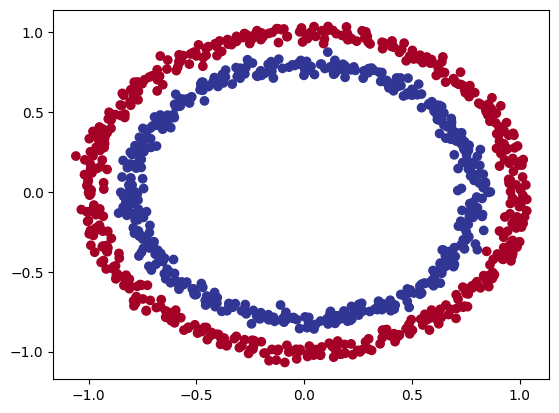

In [106]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Input and Output shapes

In [107]:
X.shape, y.shape

((1000, 2), (1000,))

In [108]:
# How many samples we're working
len(X) ,len(y)

(1000, 1000)

In [109]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in Modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [110]:
import tensorflow as tf

## Create the baseline model

In [111]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 0.8121 - accuracy: 0.4936
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.4994
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.4959
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1739 - accuracy: 0.4972
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1735 - accuracy: 0.4963


In [112]:
# Let's try and improve our model by training for longer
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.5000


[0.17344312369823456, 0.5]

Since we're working on a binary classificaiton problem and our model is getting around ~50% accuracy...it's performing as if it's guessing.

## So let's improve model by adding an extra layer

In [113]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [114]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.5000


[0.17371563613414764, 0.5]

## Improving our Model
Let's look into our bag of tricks to see how we can improve our model.

Common ways to improve a deep model:
* Adding layers
* Increase the number of hodden units
* Change the activation functions
* Change the optimization functions
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [115]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using Sequential API (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [116]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.5000


[0.17337612807750702, 0.5]

Whats going on with these models. Let's Explore

## Visualize

In [117]:
import numpy as np

In [118]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


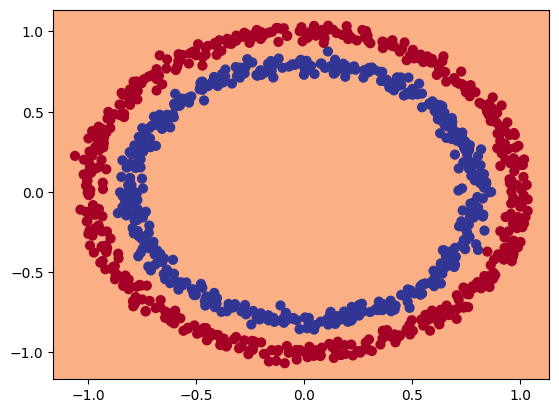

In [119]:
# Check out the predicitons our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

## Let's see `model_3` can be fitted for a regression problem

In [120]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 12ms/step - loss: -459266020343808.0000 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: -8365024871448576.0000 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: -31588320525942784.0000 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: -105137561000738816.0000 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: -271784224820822016.0000 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: -674214482838290432.0000 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: -1528947746797518848.0000 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: -2840385980219785216.0000 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================]

loss : nan because we compiled our model for a binary classification problem.

## Let's Change the model to suit the Data

In [121]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

In [122]:
# Evaluate the model
model_3.evaluate(tf.expand_dims(X_reg_train, axis=-1), y_reg_train)

5/5 [==============================] - 0s 3ms/step - loss: 38.6576 - mae: 38.6576


[38.65757369995117, 38.65757369995117]

2/2 [==============================] - 0s 7ms/step


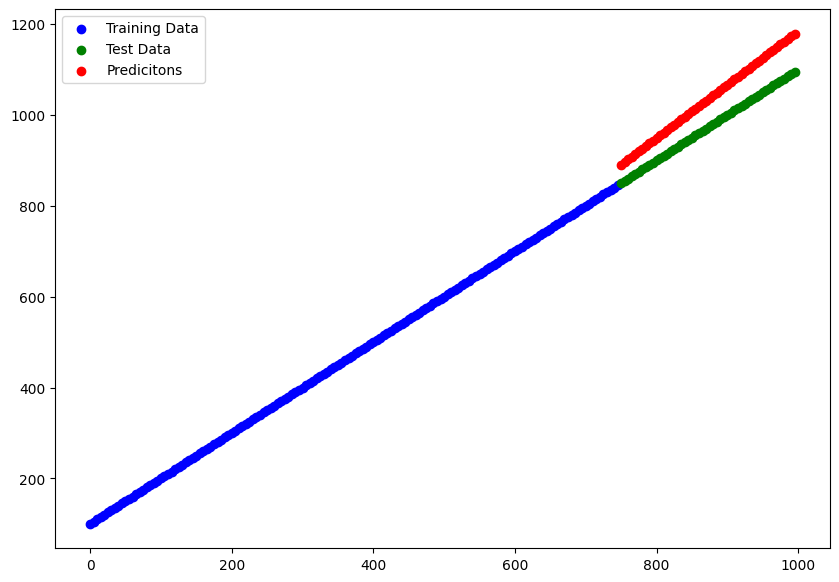

In [123]:
# Make predictions with our training model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predicitons against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predicitons")
plt.legend()

## The missing piece: Non Linearity

### Building first neural network with a non-linear activation function

In [124]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [125]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.4982


[0.17996865510940552, 0.49818751215934753]

### Improving the model

In [126]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_6.fit(X, y, epochs=200, verbose=0)

In [127]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9770


[0.07406644523143768, 0.9769999980926514]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


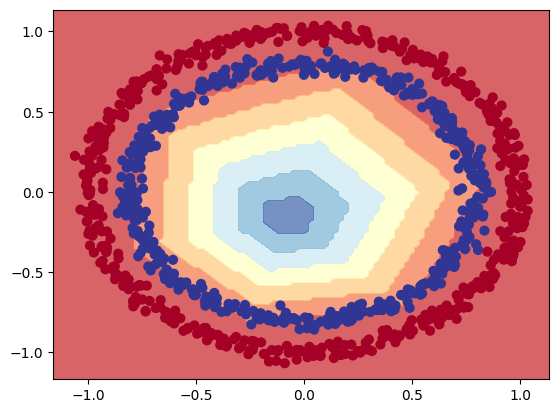

In [128]:
# Check out the predicitons our model is making
plot_decision_boundary(model=model_6, X=X, y=y)

### Improving the model `model_7`

In [129]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=200, verbose=0)

In [130]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 0.9900


[0.10628721863031387, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


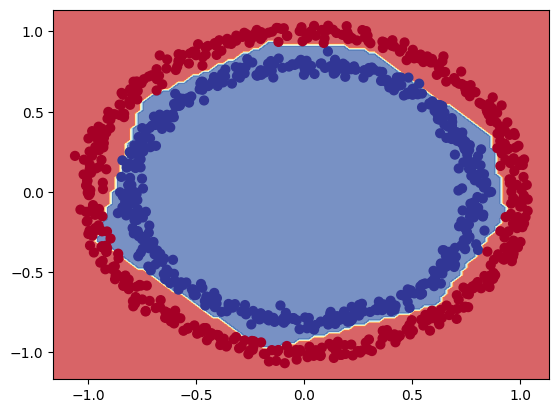

In [131]:
# Let's Visualize
plot_decision_boundary(model=model_7, X=X, y=y)

### Linear and Non linear functions
The combination of **linear and non-linear functions** is one of the key fundamentals of neural networks.


In [132]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

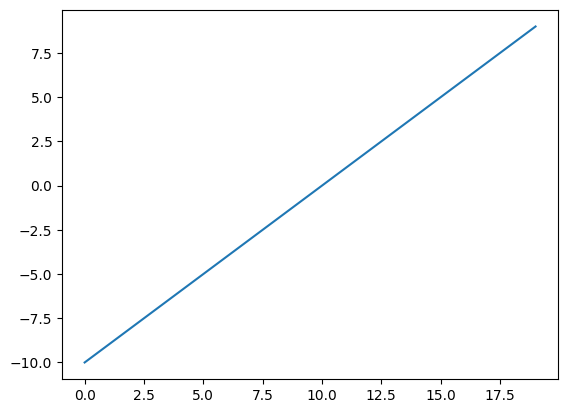

In [133]:
# Visualize toy tensor
plt.plot(A)

#### Sigmoid

In [134]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

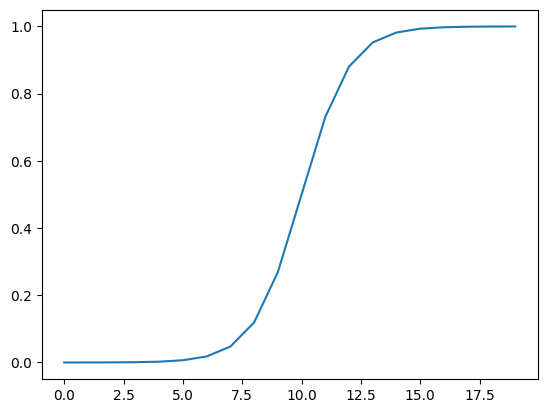

In [135]:
# Plot our toy tensor
plt.plot(sigmoid(A))

#### ReLU

In [136]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0,
                    x)

# Pass our toy tensor to relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

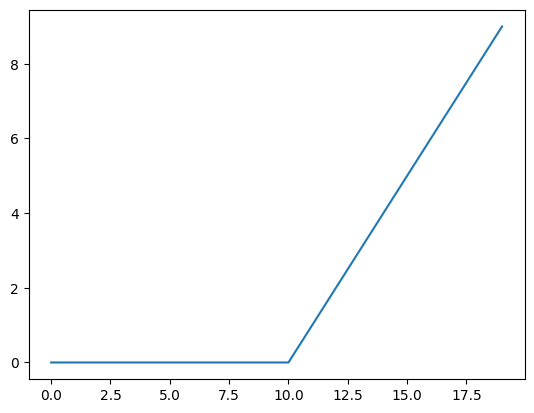

In [137]:
# Plot ReLu-modified tensor
plt.plot(relu(A))


#### Linear Activation function

In [138]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

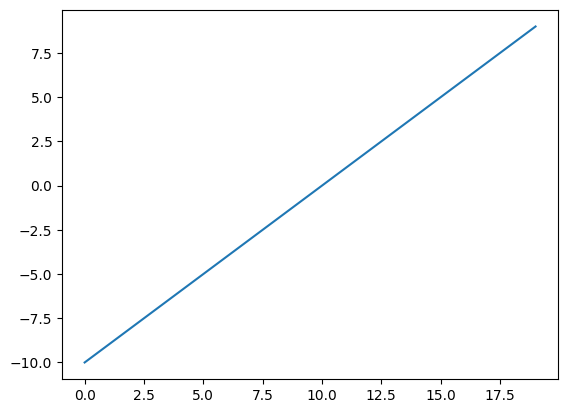

In [139]:
# Plot Linear activation function on toy tensor
plt.plot(tf.keras.activations.linear(A))

#### Tanh Activation Function

In [140]:
tf.keras.activations.tanh(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -1.        , -0.99999833, -0.99998784,
       -0.99990916, -0.9993292 , -0.9950547 , -0.9640276 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640276 ,  0.9950547 ,  0.9993292 ,
        0.99990916,  0.99998784,  0.99999833,  1.        ,  1.        ],
      dtype=float32)>

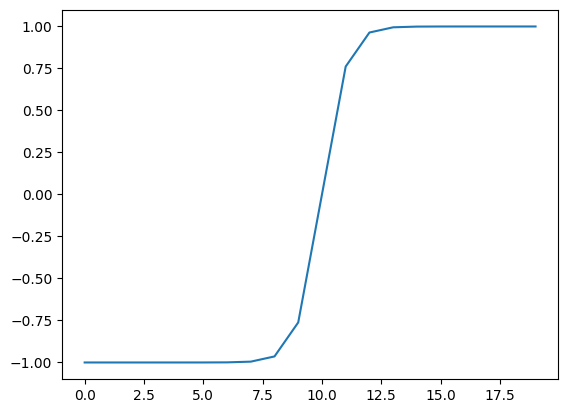

In [141]:
# Plot tanh activation function on toy tensor
plt.plot(tf.keras.activations.tanh(A))

## Evaluating and Improving our Classification

So far we've been training and testing on the same dataset...
However, in ML this is basically a sin.
So let's create a training and testing set.

In [142]:
# Check how many examples we have
len(X), len(y)

(1000, 1000)

In [143]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [144]:
# Modelling on training data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7132 - accuracy: 0.4563
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4538
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4988
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4812
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5600
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.4988
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5275
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5525
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5225
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5525
Epoch 11/25
25/25 [

In [145]:
# 4. Evaluate the model on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.6550


[0.6183837652206421, 0.6549999713897705]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


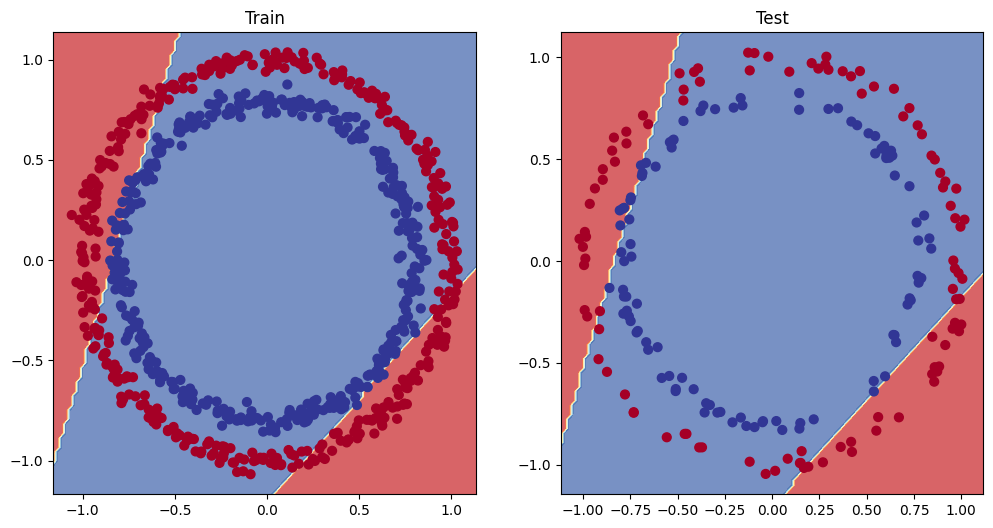

In [146]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)

It can be seen that just by tweaking learning rate we can optimze our model.

## Plot the loss (or training) curves

In [147]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.713172,0.45625
1,0.698940,0.45375
2,0.693442,0.49875
3,0.692239,0.48125
4,0.690333,0.56000
5,0.688935,0.49875
6,0.685727,0.52750
7,0.684836,0.55250
8,0.683098,0.52250
9,0.679056,0.55250


Text(0.5, 1.0, 'Model_8 loss curves')

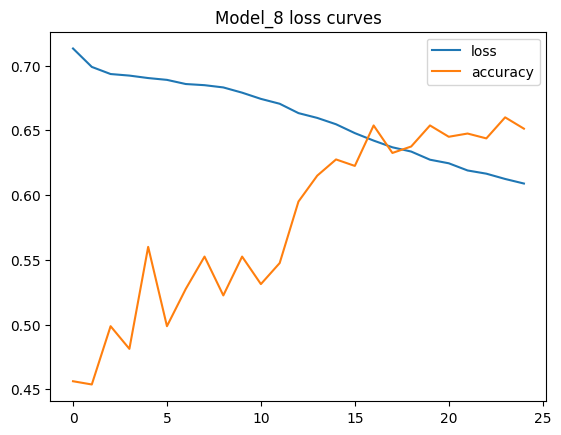

In [148]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**NOTE:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - You can think of a callback as an extra piece of functionality, you can add to your **while** its training.
* Another model.
* A modified loss curves plots.

In [149]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7287 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7276 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7265 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7253 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7241 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7230 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

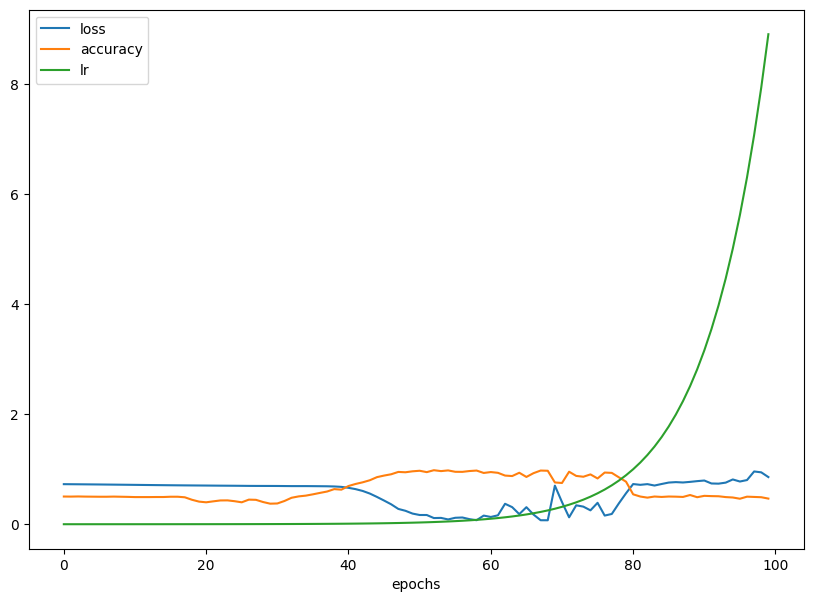

In [150]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

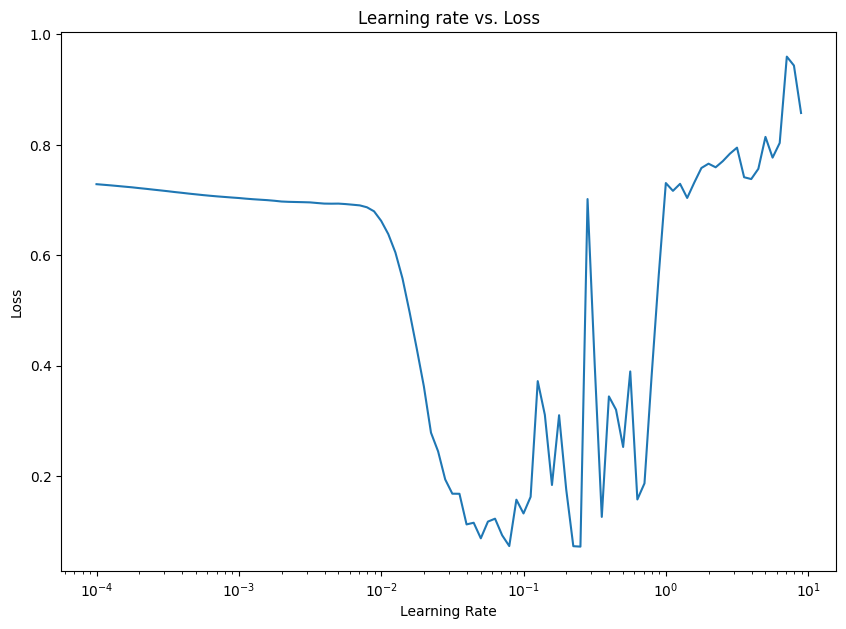

In [151]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [152]:
# Example of other typical learning rates values:

# 10 ** 0, 10 ** -1, 10 ** -2, 10 ** -3, 10 ** -4

### Let's improve model using a higher (ideal) learning rate

In [153]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6876 - accuracy: 0.5337
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6175
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.5987
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6637
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7600
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.8200
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8850
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.9100
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9700
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9925
Epoch 11/20
25/25 [

In [154]:
# 4. Evaluate the model_10 on test data
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9950


[0.03200441226363182, 0.9950000047683716]

In [155]:
# Evaluate the model_8 on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6550


[0.6183837652206421, 0.6549999713897705]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


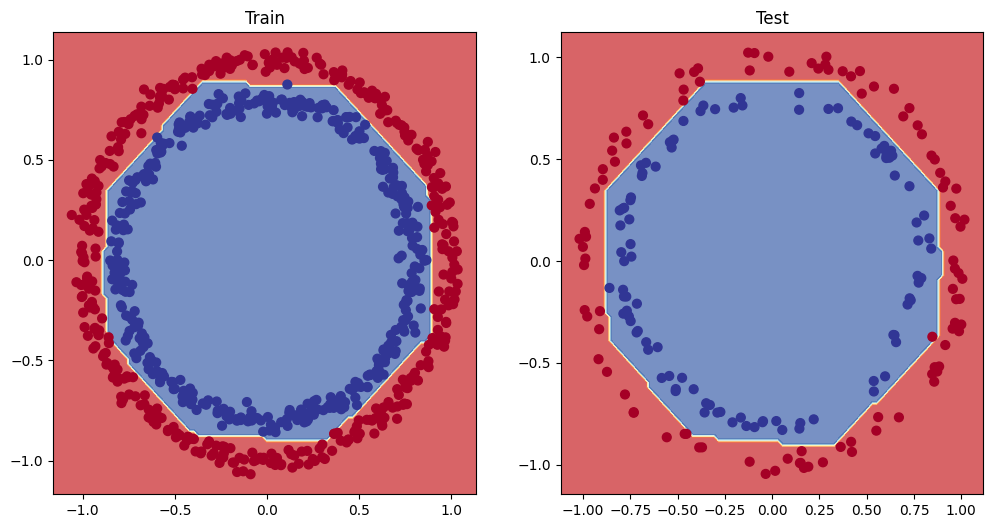

In [156]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_10, X=X_test, y=y_test)
plt.show()

# More Classification Evaluation methods
Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics we should be familiar with:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report (from SKLearn)

## Confusion Matrix

In [157]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds) # Gives Error

7/7 [==============================] - 0s 4ms/step


In [158]:
y_test[:5]

array([1, 1, 1, 1, 0])

In [159]:
y_preds[:5]

array([[0.9825692 ],
       [0.99921393],
       [0.9928255 ],
       [0.9946092 ],
       [0.10748975]], dtype=float32)

Our predictions array has comes out in **prediction probability form** (the standard output from sigmoid (or softmax) activation functions.

In [160]:
# Convert predicitons array into binary format and create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

## Prettify Confusion Matrix


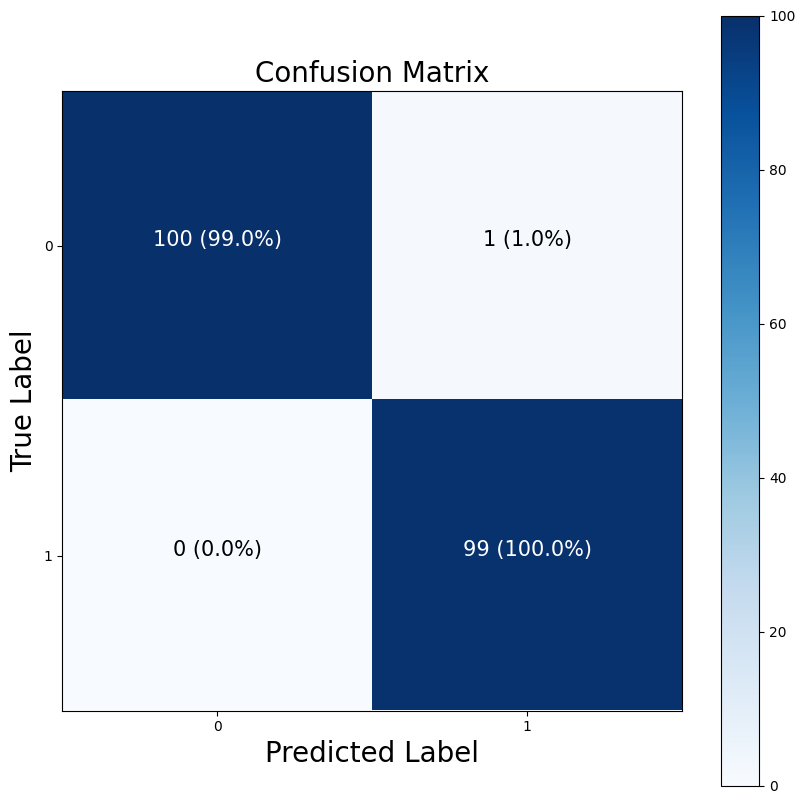

In [161]:
# Note : The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

#Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Mini Project - Multiclass Classification
In this, we're going to build a neural network to classify images of different items of clothing.
* We'll use `fashion_mnist` dataset provided by tensorflow keras

In [162]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and testing sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [163]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [164]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

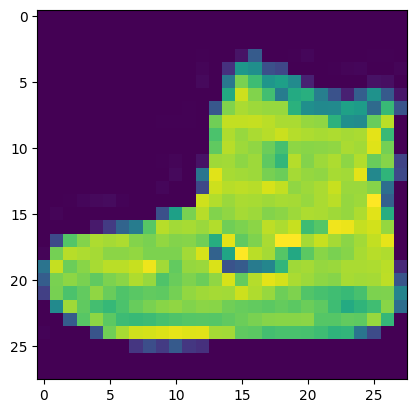

In [165]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [166]:
# Check out samples label
train_labels[0]

9

In [167]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

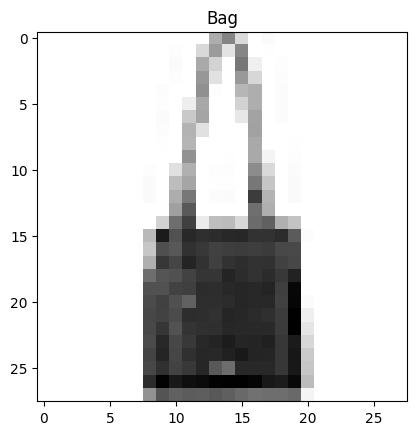

In [168]:
# Plot an example image and its label
index_of_choice = 200
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

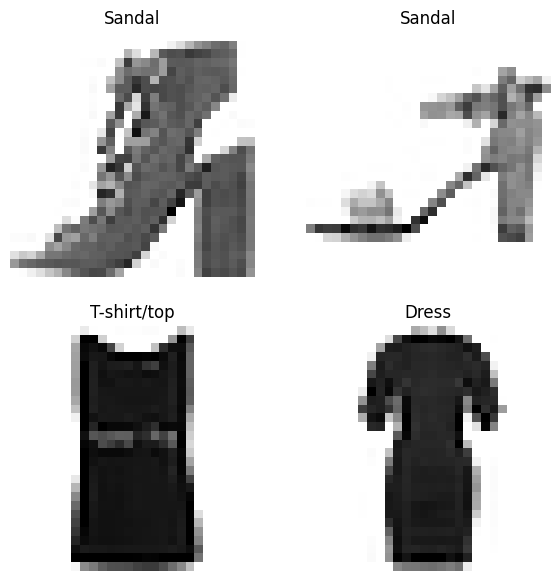

In [169]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architechture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

## BASELINE MODEL

In [170]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3111 - accuracy: 0.1010 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy

## Improving our baseline model
* Using Normailized data instead of original data.

In [171]:
# Chekc the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalised), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [172]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Chekc the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [173]:
# Now our data is normalized, let's build a model to find patterns in it
# Same as model_11 but with normilised data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 1.8034 - accuracy: 0.2379 - val_loss: 1.5016 - val_accuracy: 0.3259
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4696 - accuracy: 0.3579 - val_loss: 1.4374 - val_accuracy: 0.3769
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4289 - accuracy: 0.3744 - val_loss: 1.4152 - val_accuracy: 0.3821
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4084 - accuracy: 0.3842 - val_loss: 1.4064 - val_accuracy: 0.3927
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3975 - accuracy: 0.3888 - val_loss: 1.3928 - val_accuracy: 0.4008
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3890 - accuracy: 0.3959 - val_loss: 1.3806 - val_accuracy: 0.4109
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3833 - accuracy: 0.3974 - val_loss: 1.3881 - val_accurac

<Axes: title={'center': 'Normalized data'}>

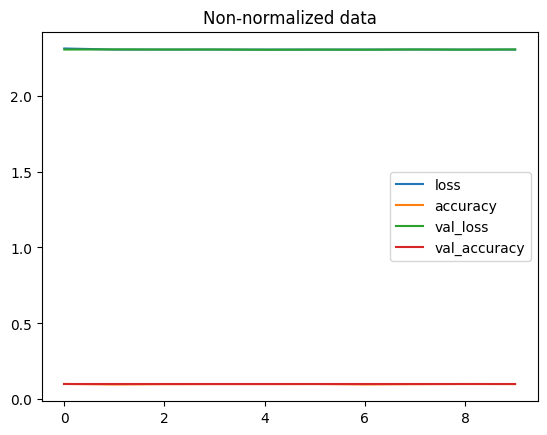

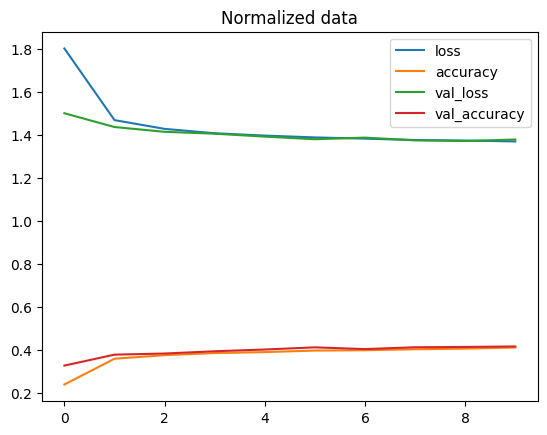

In [174]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**NOTE:** The same model with even **slightly** different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [175]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler]
                               )

Epoch 1/40
1875/1875 [==============================] - 13s 6ms/step - loss: 1.2464 - accuracy: 0.5551 - val_loss: 0.8155 - val_accuracy: 0.7294 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7307 - accuracy: 0.7411 - val_loss: 0.7089 - val_accuracy: 0.7321 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6534 - accuracy: 0.7486 - val_loss: 0.6680 - val_accuracy: 0.7436 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6200 - accuracy: 0.7558 - val_loss: 0.6458 - val_accuracy: 0.7505 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6043 - accuracy: 0.7635 - val_loss: 0.6353 - val_accuracy: 0.7526 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5892 - accuracy: 0.7734 - val_loss: 0.6283 - val_accuracy: 0.7645 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 

Text(0.5, 1.0, 'Finding the ideal learning rate')

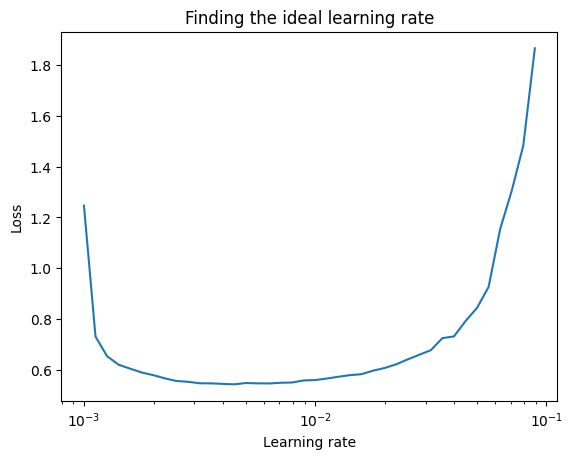

In [176]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

## Refitting model with ideal learning rate

In [177]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])


# Fit the model
history_14 = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler]
                               )

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1742 - accuracy: 0.5697 - val_loss: 0.8139 - val_accuracy: 0.7237 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7125 - accuracy: 0.7547 - val_loss: 0.6915 - val_accuracy: 0.7658 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6352 - accuracy: 0.7764 - val_loss: 0.6429 - val_accuracy: 0.7775 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6069 - accuracy: 0.7826 - val_loss: 0.6221 - val_accuracy: 0.7804 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5905 - accuracy: 0.7869 - val_loss: 0.6348 - val_accuracy: 0.7703 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5781 - accuracy: 0.7906 - val_loss: 0.6082 - val_accuracy: 0.7813 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 4s

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [178]:
# Create a confusion matrics
# Note : The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [179]:
# Make predictions with out model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.13008667e-07, 9.64714093e-16, 1.81538610e-07, 7.21279179e-08,
        1.70988430e-12, 1.26019210e-01, 2.52237101e-07, 1.17820516e-01,
        3.47984297e-07, 7.56159246e-01],
       [5.14805969e-03, 5.39060647e-06, 8.90265346e-01, 2.60101818e-02,
        8.60047713e-03, 8.51027609e-04, 6.59807995e-02, 1.05033955e-07,
        3.08953528e-03, 4.90172206e-05],
       [2.70042277e-04, 9.94885385e-01, 2.05601722e-08, 4.63982485e-03,
        1.79296214e-04, 0.00000000e+00, 2.52581976e-05, 0.00000000e+00,
        1.67442849e-07, 0.00000000e+00],
       [8.68418792e-05, 9.92316067e-01, 1.03651221e-08, 7.43296463e-03,
        1.55927672e-04, 0.00000000e+00, 8.06785192e-06, 0.00000000e+00,
        7.71622197e-08, 0.00000000e+00],
       [3.58967036e-01, 1.38809450e-03, 3.62177268e-02, 2.03619972e-02,
        6.38337806e-03, 9.56859338e-08, 5.70820928e-01, 1.32684574e-09,
        5.86082926e-03, 4.49641324e-10]], dtype=float32)

In [180]:
# Convert all of the prediciton probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

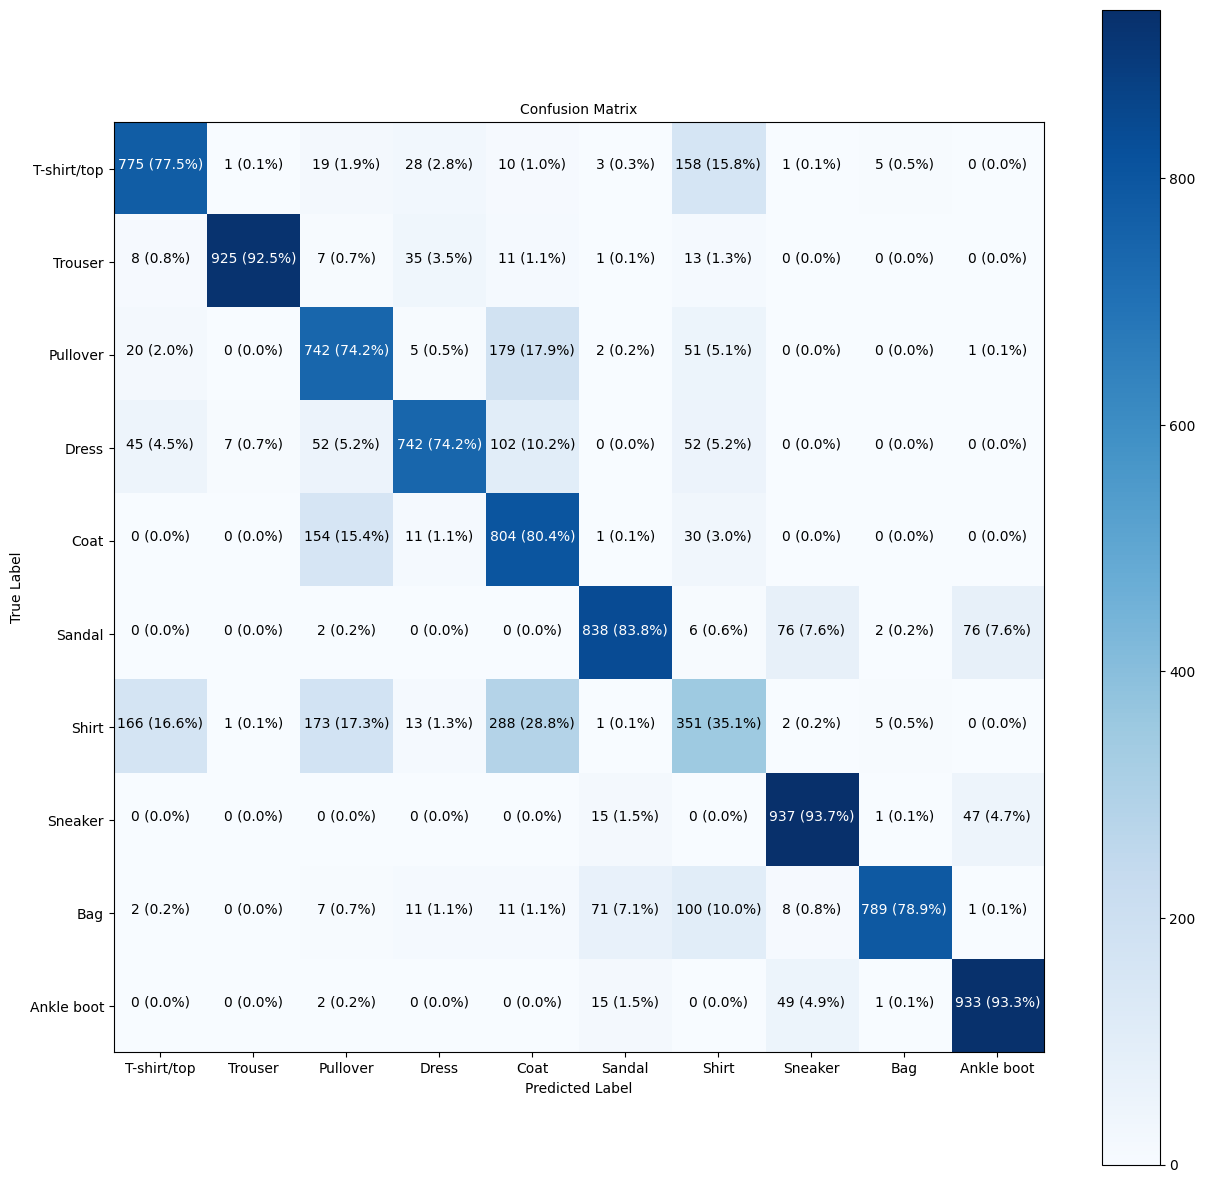

In [181]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> **NOTE:** Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label


In [182]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up a random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediciton/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 61ms/step


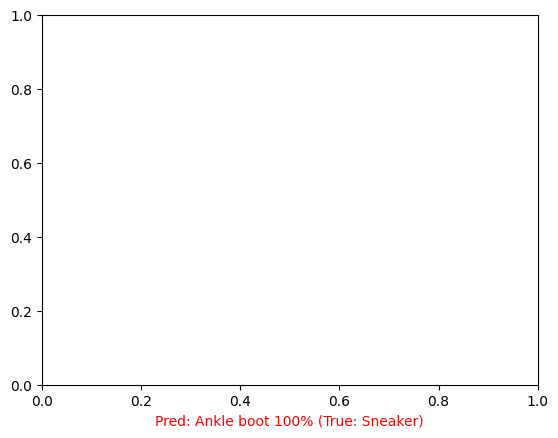

In [183]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [184]:
# Find the layers or our most recent model
model_14.layers

In [185]:
# Extract a particular layer
model_14.layers[1]

In [187]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 1.0618987 ,  0.31527793, -1.4067413 ,  1.859731  ],
        [ 5.121526  ,  6.236607  , -1.114892  ,  1.7865627 ],
        [ 3.635019  ,  5.4433255 , -3.0855649 ,  2.1077247 ],
        ...,
        [ 1.2324351 , -1.1907712 , -1.2683662 , -0.01539993],
        [ 0.6486571 , -0.55793524, -0.7398303 , -1.0597519 ],
        [ 0.5340297 ,  1.5837868 , -1.0275897 ,  2.478834  ]],
       dtype=float32),
 (784, 4))

In [188]:
model_14.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_77 (Dense)            (None, 4)                 3140      
                                                                 
 dense_78 (Dense)            (None, 4)                 20        
                                                                 
 dense_79 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
# Bias and biases shapes
biases, biases.shape

(array([5.965526 , 3.0262797, 7.0505657, 3.7977564], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get inititalized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.


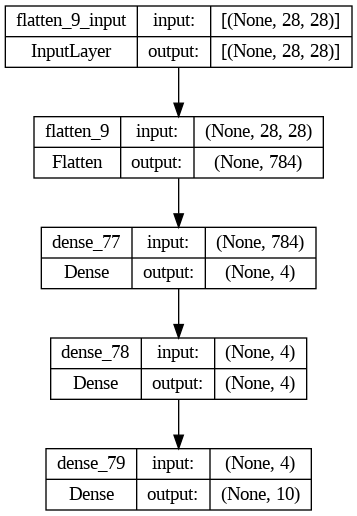

In [192]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)